In [1]:
import os
import sys
sys.path.append(os.path.join(os.getcwd()))

import optuna
import yaml
from torch import tensor
import torch

from src.model.dataset import MaskRCNNDataset
from src.model.model import maskRCNNModel
from src.utils.data_utils import run_length_decode, run_length_encode


/Users/francesco/miniconda3/envs/colorec/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset_path = "../dataset/merge_together_corrected_m"

dataset = MaskRCNNDataset(dataset_path, datatype="train")
print(dataset[0][1]["masks"][0].sum())


device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model = maskRCNNModel()
model_weights_path = os.path.join(os.path.dirname(os.getcwd()), "model/best-checkpoint-144.bin")
checkpoint = torch.load(model_weights_path, map_location=device)
model.load_state_dict(checkpoint['model_state_dict'])
model.to(device)
model.eval()

image_norm = dataset[0][0].unsqueeze(0).to(device)
print(image_norm.shape)
with torch.no_grad():
    prediction = model(image_norm)
print(prediction[0].keys())
masks = prediction[0]['masks'].squeeze(1)
print(masks.shape)
for mask in masks:
    print(mask.shape)
    rle = run_length_encode(mask)
    print(rle)
    rle_int = rle.split(" ")
    rle_int = [int(x) for x in rle_int]
    print(sum(rle_int))
    print(mask.shape[0]*mask.shape[1])
    mask_2 = run_length_decode(rle, (mask.shape[0], mask.shape[1]))
    mask = (mask > 0.5).type(torch.uint8).flatten()
    print(mask_2.sum())
    print(mask.sum())
    break

/Users/francesco/Documents/Work/Colorectal-Cancer-Organoids-Detection/src/model/dataset.py:30: UserWarning: Argument 'always_apply' is not valid and will be ignored.
  A.ShiftScaleRotate(shift_limit=0.30, scale_limit=[-0.5, 1.0], rotate_limit=45, interpolation=1, # weights3/ -0.5 - 1.0
/Users/francesco/miniconda3/envs/colorec/lib/python3.12/site-packages/albumentations/core/validation.py:45: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)
/Users/francesco/Documents/Work/Colorectal-Cancer-Organoids-Detection/src/model/dataset.py:32: UserWarning: Argument 'always_apply' is not valid and will be ignored.
  A.RandomResizedCrop(size = (512, 512), scale=(0.1, 1.0), ratio=(0.75, 1.33), interpolation=1,


tensor(2360)


/var/folders/74/pjwdjs550d91v4lc_1_rqm6r0000gn/T/ipykernel_37370/3918276227.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(model_weights_path, 

torch.Size([1, 3, 1440, 1920])
dict_keys(['boxes', 'labels', 'scores', 'masks'])
torch.Size([126, 1440, 1920])
torch.Size([1440, 1920])
695960 15 1895 30 1886 37 1879 43 1874 48 1870 51 1867 55 1864 58 1861 60 1859 62 1857 65 1854 67 1852 69 1851 70 1849 71 1849 72 1848 73 1846 75 1845 76 1844 76 1844 77 1843 77 1843 78 1842 78 1842 79 1841 79 1841 80 1840 80 1840 80 1840 81 1839 81 1839 81 1839 82 1838 82 1838 82 1838 82 1838 82 1838 82 1839 81 1839 81 1839 81 1839 81 1840 80 1840 81 1839 81 1840 80 1840 80 1841 79 1841 79 1841 79 1842 78 1843 77 1843 77 1843 77 1844 75 1845 75 1846 74 1847 73 1847 73 1848 71 1850 69 1851 69 1852 67 1854 65 1855 64 1857 62 1859 60 1861 58 1862 57 1864 54 1867 52 1869 50 1871 48 1873 45 1876 43 1878 41 1881 37 1884 35 1887 32 1890 28 1898 18 1915219
2764800
2764800
tensor(5383)
tensor(5383)


/Users/francesco/miniconda3/envs/colorec/lib/python3.12/site-packages/albumentations/core/composition.py:250: UserWarning: Got processor for bboxes, but no transform to process it.
  self._set_keys()


torch.Size([69, 1440, 1920])


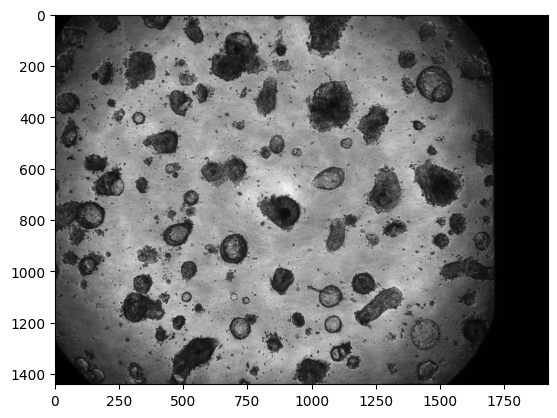

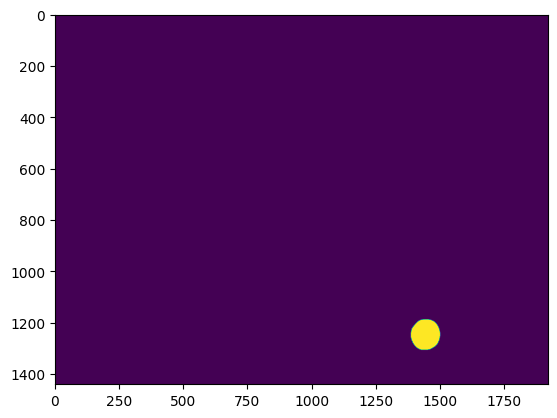

10885.0
0.35490508787089653


In [1]:
from src.utils.data_utils import run_length_decode, run_length_encode, mask_to_contour, mask_to_eccentricity, masks_to_area
from src.model.dataset import MaskRCNNDataset

import torch
import matplotlib.pyplot as plt


dataset_path = "../dataset/val"
dataset = MaskRCNNDataset(dataset_path, datatype="eval")
image, predictions = dataset[4]
print(predictions["masks"].shape)
mask = predictions["masks"][0]
plt.imshow(image.permute(1, 2, 0))
plt.show()
plt.imshow(mask)
plt.show()
zeros = torch.zeros_like(mask)
cont = mask_to_contour(mask)
# print(cont)
area = masks_to_area(mask)
print(area)
ecc = mask_to_eccentricity(mask)
print(ecc)
